# Importing libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

# Loading Data

In [67]:
data = pd.read_csv('market.csv')

In [68]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### From output it's visible that
1. There are Missing values in income
2. Dt_customer format isn't correct
3. We need to encode some features to numeric forms later

In [5]:
# Handle missing values by dropping rows with missing values

In [70]:
data = data.dropna()

In [71]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
# Convert 'Dt_Customer' column to datetime format

In [72]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [7]:
# Calculate 'Customer_For' as the number of days since the customer joined

In [73]:
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [74]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)

data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'],errors = 'coerce')

In [8]:
# Explore categorical features: 'Marital_Status' and 'Education'

In [75]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [76]:
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [9]:
# Calculate 'Age' as the difference between the current year (2021) and 'Year_Birth'

In [77]:
data['Age'] = 2021-data['Year_Birth']

In [10]:
# Calculate total amount spent by summing up different spending categories

In [78]:
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [11]:
# Create a new feature 'Living_With' to categorize marital status

In [79]:
data['Living_With'] = data['Marital_Status'].replace({
    'Married' : 'Partner',
    'Together' : 'Partner',
    'Absurd' : 'Alone',
    'Widow' : 'Alone',
    'YOLO' : 'Alone',
    'Divorced' : 'Alone',
    'Single' : 'Alone'
})

In [12]:
# Calculate 'Children' as the sum of 'Kidhome' and 'Teenhome'

In [80]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [13]:
# Calculate 'Family_Size' by considering the 'Living_With' category and number of children

In [81]:
data['Family_Size'] = data['Living_With'].replace({
    'Alone' : 1,
    'Partner' : 2
}) + data['Children']

In [14]:
# Create a binary feature 'Is_Parent' indicating whether the customer has children or not

In [82]:
data['Is_Parent'] = np.where(data.Children>0,1,0)

In [15]:
# Map 'Education' categories to more meaningful names

In [83]:
data['Education'] = data['Education'].replace({
    'Basic' : 'Undergraduate',
    '2n Cycle' : 'Undergraduate',
    'Graduation' : 'Graduate',
    'Master' : 'PostGraduate',
    'PhD' : 'PostGraduate'
})

In [16]:
# Rename columns for better clarity

In [84]:
data = data.rename(columns = {'MntWines' : 'Wines' , 'MntFruits' : 'Fruits' , 'MntMeatProducts' : 'Meat' , 
                              'MntFishProducts' : 'Fish' , 'MntSweetProducts' : 'Sweets' , 'MntGoldProds' : 'Gold'})

In [85]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [17]:
# Drop unnecessary columns

In [86]:
to_drop = ['Dt_Customer','Marital_Status', 'Z_CostContact', 'Z_Revenue','ID', 'Year_Birth']
data = data.drop(to_drop,axis=1)

In [87]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


In [88]:
sns.set(rc = {'axes.facecolor' : '#FFF9ED','figure.facecolor':'#FFF9ED'})
pallet = ['#682F2F','#9E726F','#D6B2B1','#B9C0C9','#9F8A78','#F3AB60']

In [89]:
To_Plot = ['Income','Recency','Customer_For','Age','Spent','Is_Parent']

In [18]:
# Create pair plots to visualize relationships between the selected features

<Figure size 576x396 with 0 Axes>

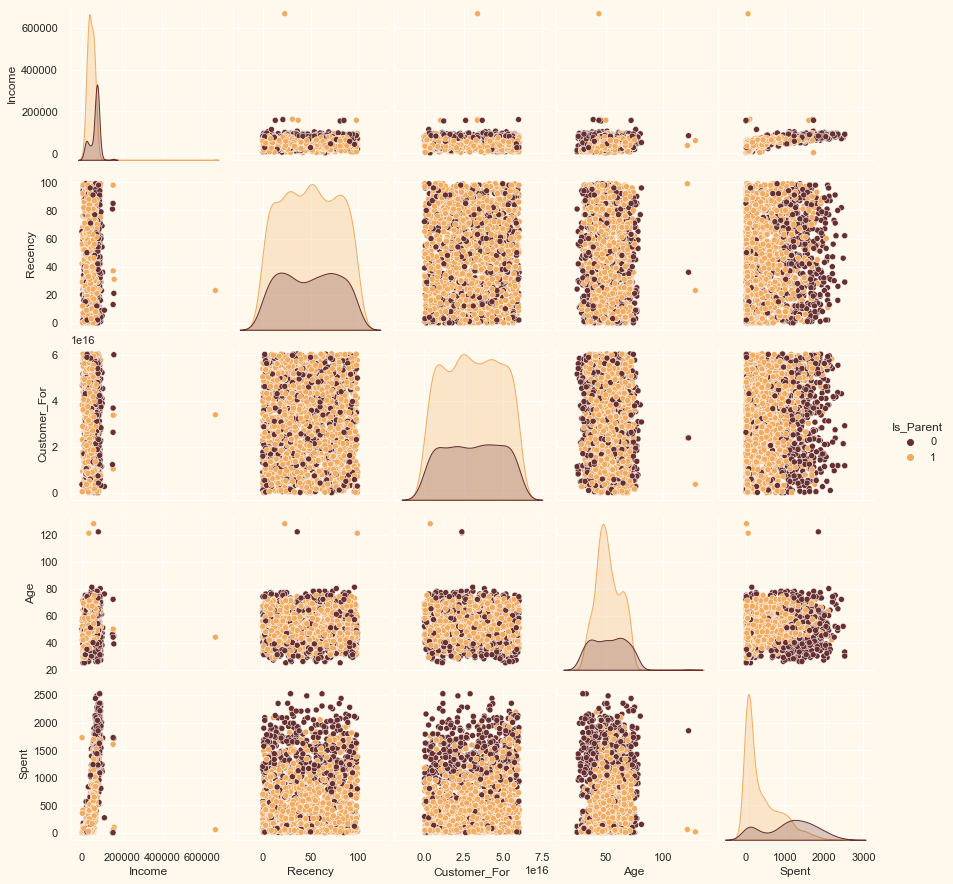

In [90]:
plt.figure()
sns.pairplot(data[To_Plot],hue = 'Is_Parent',palette = (['#682F2F','#F3AB60']))
plt.show()

In [91]:
data = data[data['Age']<90]
data = data[data['Income']<600000]

<AxesSubplot:>

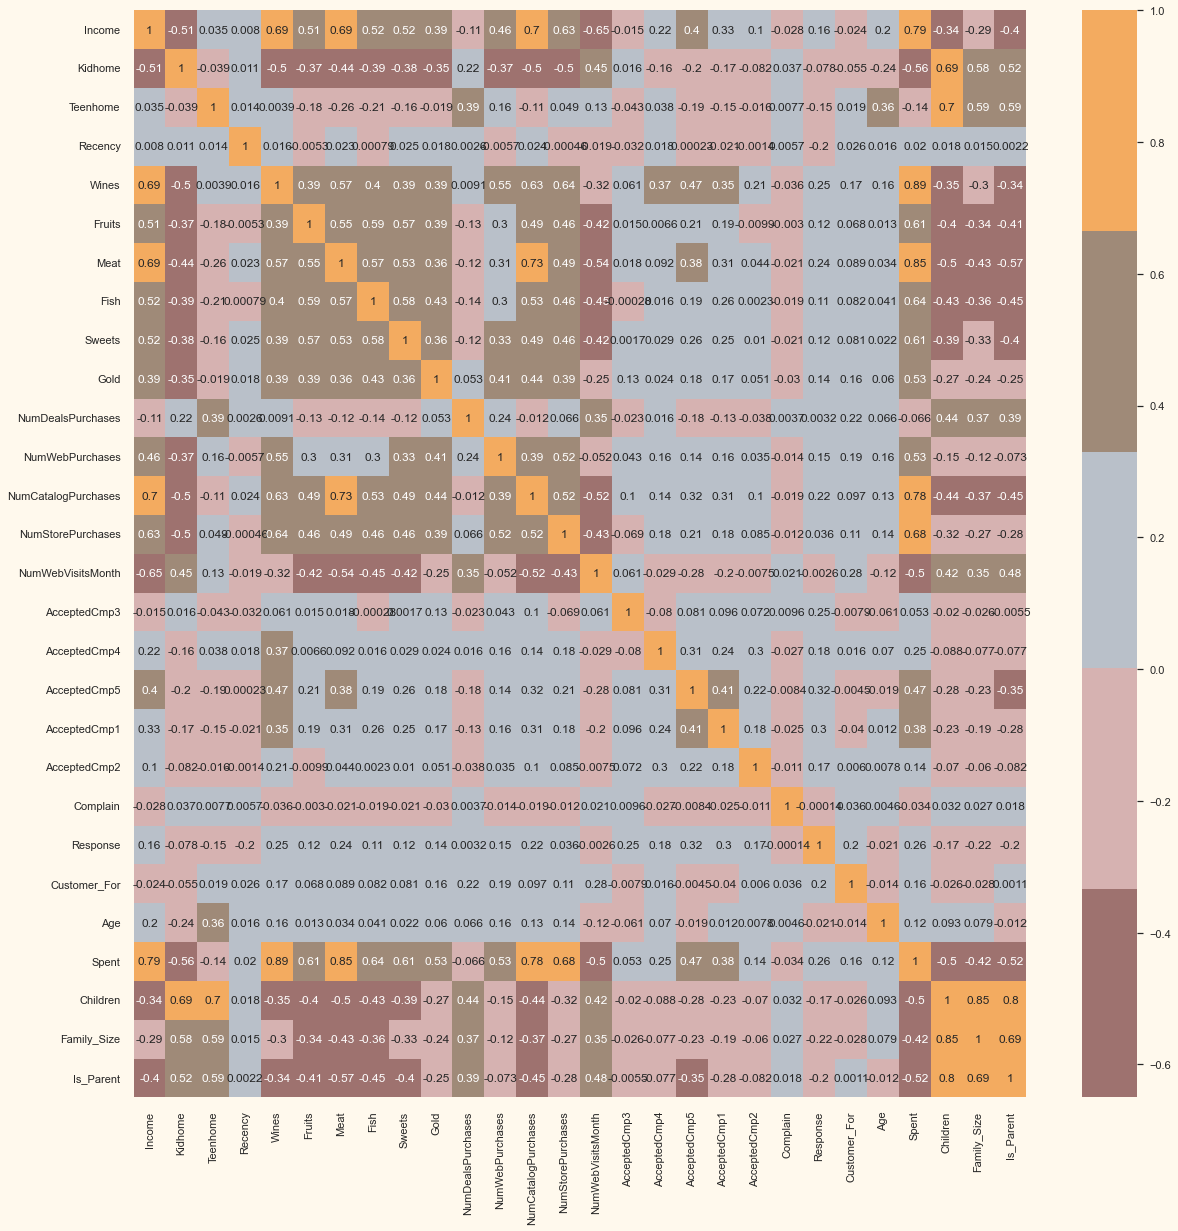

In [92]:
corrmat = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True,cmap = pallet,center=0)

# Data Preprocessing

In [19]:
# Identify categorical columns and perform label encoding on the categorical columns

In [93]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [94]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

In [20]:
# Drop additional columns for clustering and Perform feature scaling using StandardScaler

In [95]:
ds = data.copy()
cols_del = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Complain','Response']
ds = ds.drop(cols_del,axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns = ds.columns)

In [96]:
scaled_ds

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.893586,0.430444,-0.822754,0.908097,-0.104347,1.197084,0.419540,0.066770,0.079461,2.213965,...,0.111982,-0.555814,-0.132545,0.134778,0.163575,1.218061,0.740959,0.069987,0.449070,0.632456
2208,0.571657,0.560123,2.902796,0.908097,0.241237,0.298631,-0.662628,-0.611184,-0.687527,-0.658360,...,-0.229679,-0.248141,0.692181,-1.653326,1.958607,-0.271040,0.740959,2.739158,2.656499,0.632456
2209,-0.893586,0.233347,-0.822754,-0.929699,1.450778,1.787156,0.545373,0.222878,-0.103155,-0.366260,...,0.111982,2.213242,0.279818,-0.981552,-1.033114,1.052052,-1.349603,-1.264598,-1.758359,-1.581139
2210,0.571657,0.803172,-0.822754,0.908097,-1.417564,0.363866,0.092373,0.209498,0.773403,0.071892,...,0.795303,1.290224,-0.957271,-0.976612,1.103830,0.391336,0.740959,0.069987,0.449070,0.632456


# DIMENSIONALITY REDUCTION

In [97]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds),columns = (['col1','col2','col3']))

In [98]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.114238e-16,2.878602,-5.978123,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,-2.128095e-17,1.709469,-4.194757,-1.323932,-0.173716,1.234923,6.168185
col3,2212.0,4.618819e-17,1.231685,-3.625184,-0.853556,-0.051292,0.863841,6.746845


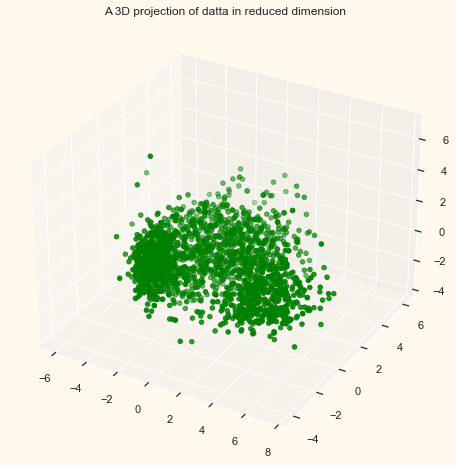

In [99]:
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(x,y,z,c='green',marker = 'o')
ax.set_title('A 3D projection of datta in reduced dimension')
plt.show()

# CLUSTERING

In [21]:
# Determine the optimal number of clusters using the elbow method

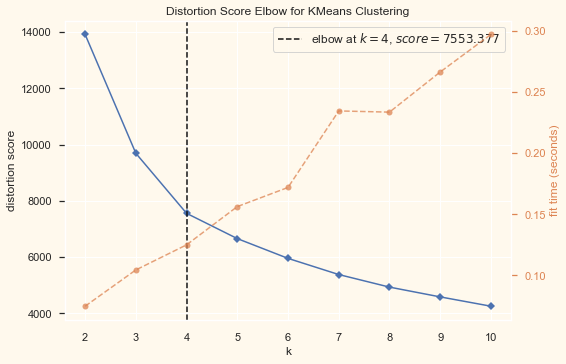

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
Elbow_M = KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [22]:
# Perform Agglomerative Clustering with 4 clusters

In [101]:
AC = AgglomerativeClustering(n_clusters = 4)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds['Clusters'] = yhat_AC
data['Clusters'] = yhat_AC

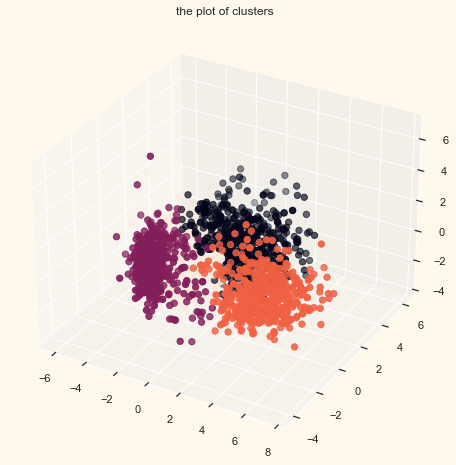

In [104]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111,projection='3d',label='bla')
ax.scatter(x,y,z,s=40,c=PCA_ds['Clusters'],marker='o')
ax.set_title('the plot of clusters')
plt.show()

# EVALUATING MODELS

<function matplotlib.pyplot.show(close=None, block=None)>

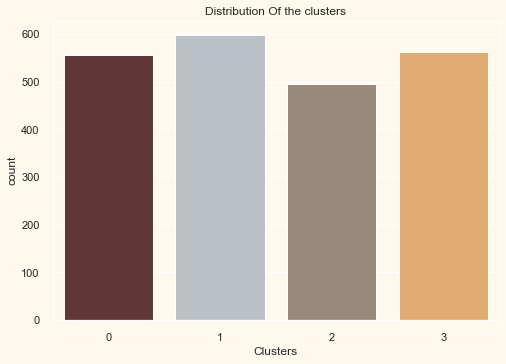

In [105]:
pal = ['#682F2F','#B9C0C9','#9F8A78','#F3AB60']
pl = sns.countplot(x=data['Clusters'],palette = pal)
pl.set_title('Distribution Of the clusters')
plt.show

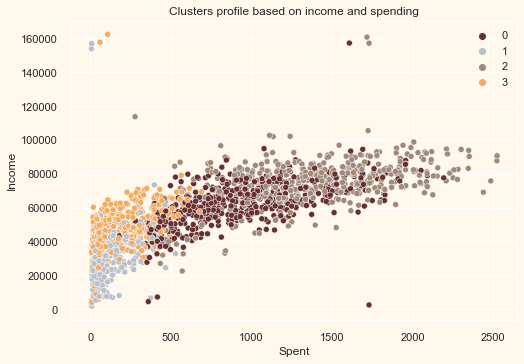

In [106]:
pl = sns.scatterplot(data=data,x=data['Spent'],y=data['Income'],hue=data['Clusters'],palette=pal)
pl.set_title('Clusters profile based on income and spending')
plt.legend()
plt.show()

1. group 0 : high spending and average income
2. group 1 : low spending and low income
3. group 2 : high spending and high income
4. group 3 : low spending and low income

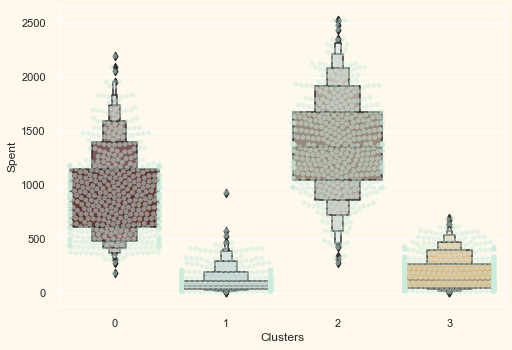

In [107]:
plt.figure()
pl = sns.swarmplot(x = data['Clusters'],y=data['Spent'],color='#CBEDDD',alpha=0.5)
pl = sns.boxenplot(x=data['Clusters'],y=data['Spent'],palette=pal)
plt.show()

cluster 2 is biggest set of customers closely followed by cluster 0 

In [108]:
data['Total_Promos'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

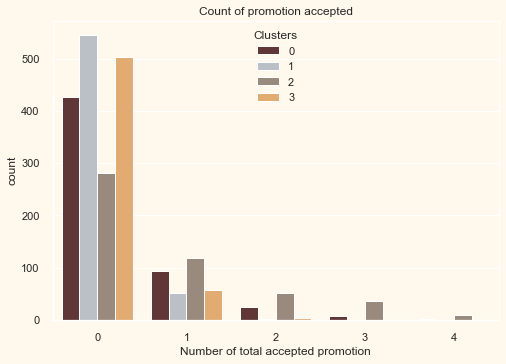

In [109]:
plt.figure()
pl = sns.countplot(x = data['Total_Promos'],hue = data['Clusters'],palette = pal)
pl.set_title('Count of promotion accepted')
pl.set_xlabel('Number of total accepted promotion')
plt.show()

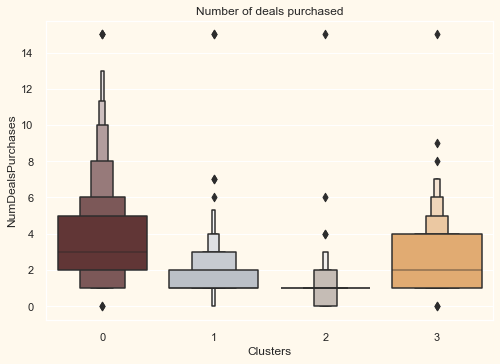

In [110]:
plt.figure()
pl = sns.boxenplot(y=data['NumDealsPurchases'],x=data['Clusters'],palette=pal)
pl.set_title('Number of deals purchased')
plt.show()

# PROFILING

In [4]:
# Visualize the relationships between personal attributes and spending across clusters

<Figure size 576x396 with 0 Axes>

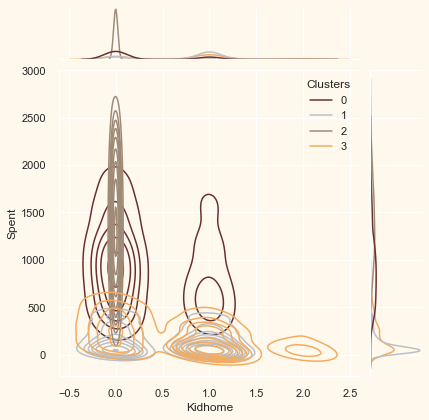

<Figure size 576x396 with 0 Axes>

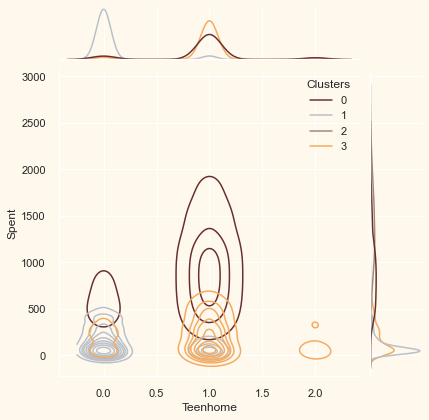

<Figure size 576x396 with 0 Axes>

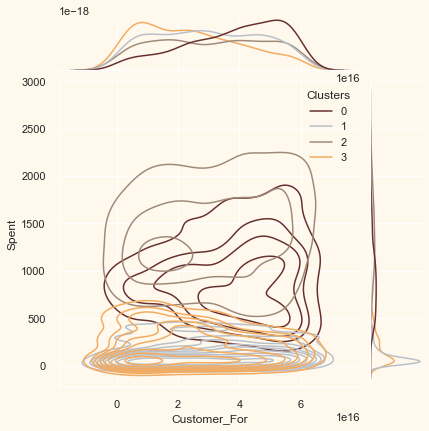

<Figure size 576x396 with 0 Axes>

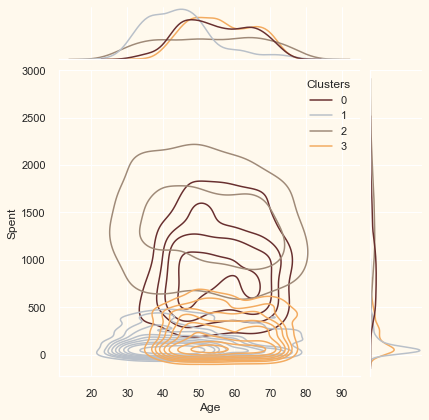

<Figure size 576x396 with 0 Axes>

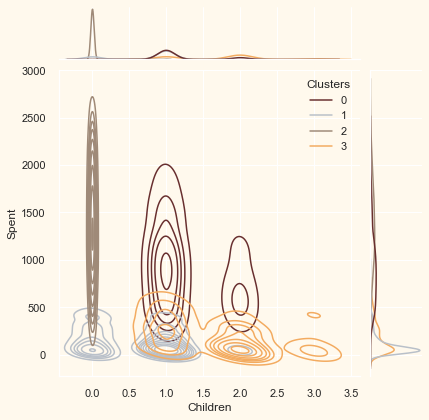

<Figure size 576x396 with 0 Axes>

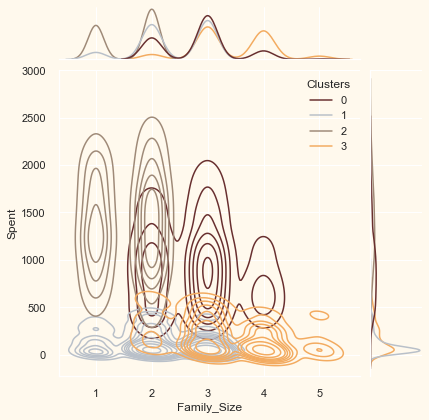

<Figure size 576x396 with 0 Axes>

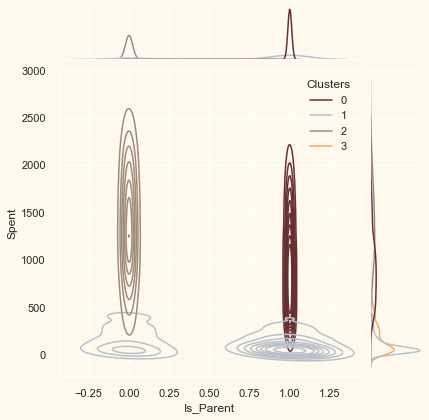

<Figure size 576x396 with 0 Axes>

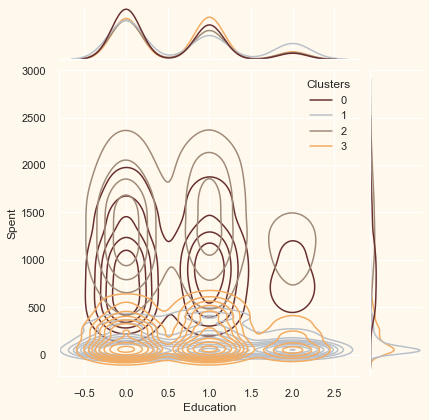

<Figure size 576x396 with 0 Axes>

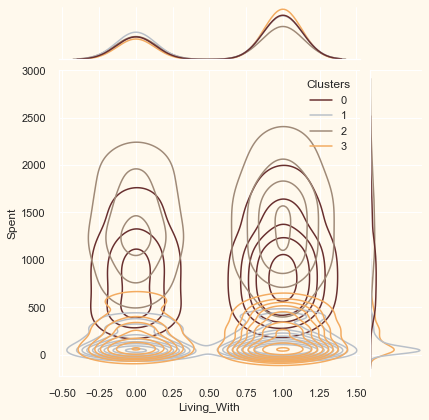

In [111]:
personal = ['Kidhome','Teenhome','Customer_For','Age','Children','Family_Size','Is_Parent','Education','Living_With']

for i in personal:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Spent'],hue=data['Clusters'],kind='kde',palette=pal)
    plt.show()

# Profile of Cluster 0:
### - Mostly parents
### - Family size ranges from 2 to 4 members
### - Majority have teenage kids
### - Relatively older
#
# Profile of Cluster 1:
### - Majority are parents
### - Family size is mostly 3 members
### - Majority have non-teenage kids
### - Relatively younger
#
# Profile of Cluster 2:
### - Not parents
### - Family size ranges from 1 to 2 members
### - Mostly couples, some singles
### - Span all ages
### - High income group
#
# Profile of Cluster 3:
### - Mostly parents
### - Family size ranges from 2 to 5 members
### - Majority have teenage kids
### - Relatively older
### - Lower income group
